In [1]:
import surprise

In [2]:
data = surprise.Dataset.load_builtin('ml-100k')
data

In [3]:
df = pd.DataFrame(data.raw_ratings, columns=['user','item','rate','id'])
del df['id']
df.head(10)

,user,item,rate
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0
5,298,474,4.0
6,115,265,2.0
7,253,465,5.0
8,305,451,3.0
9,6,86,3.0


- 추천 시스템은 사용자 아이디와 상품 아이디라는 두 개의 카테고리 입력과 
- 평점 출력을 가지는 예측 시스템

In [4]:
df_table = df.set_index(['user','item']).unstack()

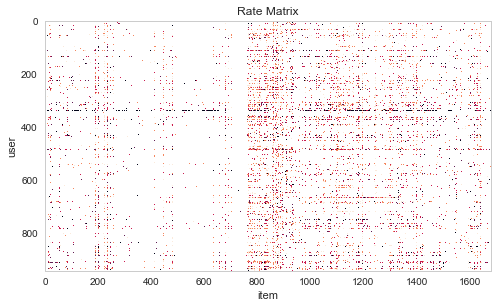

In [11]:
plt.figure(figsize=(8,5))
plt.imshow(df_table)
plt.grid(False)
plt.xlabel("item")
plt.ylabel("user")
plt.title("Rate Matrix")
plt.show()

## 추천시스템 알고리즘
1. 베이스라인 모형
2. Collaborative Filtering
    - Neighborhood Models
        - User based CF
        - Item based CF
    - Latent Factor Models
        - Matrix Factorization
        - SVD(Singular Value Decomposition)
3. Content-Based Recommendation

### 1. 베이스라인 모형
- surprise의 BaselineOnly 클래스 활용

In [13]:
from surprise.model_selection import KFold

bsl_options = {
    'method': 'als', # 알고리즘 선택
    'n_epochs': 5, # 최적화 반복횟수, 디폴트는 10
    'reg_u': 12, # user에 대한 정규화 가중치. 디폴트는 15
    'reg_i': 5 # item에 대한 정규화 가중치. 디폴트는 10
}

algo = surprise.BaselineOnly(bsl_options=bsl_options)

np.random.seed(0)
acc = np.zeros(3)
cv = KFold(3)
for i, (trainset, testset) in enumerate(cv.split(data)):
    algo.fit(trainset)
    predictions = algo.test(testset)
    acc[i] = surprise.accuracy.rmse(predictions, verbose=True)
acc.mean()

Estimating biases using als...
RMSE: 0.9453
Estimating biases using als...
RMSE: 0.9377
Estimating biases using als...
RMSE: 0.9500


0.94433049840139416

In [14]:
from surprise.model_selection import cross_validate

cross_validate(algo, data)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([ 0.9384446 ,  0.94651657,  0.93612815,  0.94221861,  0.94428787]),
 'test_mae': array([ 0.74477853,  0.75124267,  0.73975393,  0.745764  ,  0.74659098]),
 'fit_time': (0.09732937812805176,
  0.12304520606994629,
  0.1289520263671875,
  0.12652373313903809,
  0.12448406219482422),
 'test_time': (0.14434242248535156,
  0.0828547477722168,
  0.10217928886413574,
  0.08879399299621582,
  0.08186054229736328)}

### 2. Collaborative Filtering

##### Neighborhood 모형
- 특정 사용자의 평점을 예측하는 것이 아니라 
- 사용자와 유사한 사용자에 대해 가중치를 준다.
- 유사한 사용자를 기반으로 빈 데이터를 계산(user-based CF)
- 사용자가 준 점수가 비슷한 상품을 찾아 빈 데이터를 계산(item-based CF)

In [18]:
# MSD 유사도 계산
sim_options = {'name': 'msd'} # 사용할 유사도의 종류. 디폴트는 'MSD(Mean Squared Difference')
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([ 0.97650906,  0.98346442,  0.97032533,  0.98330974,  0.9818553 ]),
 'test_mae': array([ 0.77163701,  0.77538984,  0.7665685 ,  0.77493766,  0.77486794]),
 'fit_time': (0.489551305770874,
  0.5029430389404297,
  0.5103304386138916,
  0.5773422718048096,
  0.5172882080078125),
 'test_time': (2.9288837909698486,
  2.729562759399414,
  3.7353804111480713,
  3.032052755355835,
  2.805422306060791)}

In [19]:
# cosine 유사도
sim_options = {'name': 'cosine'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([ 1.02165374,  1.01094947,  1.01980738,  1.01184665,  1.02300541]),
 'test_mae': array([ 0.80651253,  0.79884201,  0.80939573,  0.79869422,  0.80983937]),
 'fit_time': (1.8009438514709473,
  1.8233342170715332,
  1.7127208709716797,
  1.8515164852142334,
  1.6665966510772705),
 'test_time': (2.819362163543701,
  3.089550018310547,
  2.9755139350891113,
  2.9740805625915527,
  2.7820425033569336)}

In [20]:
# pearson 유사도 : 두 벡터(상품-상품, 사용자-사용자)의 상관계수를 의미
sim_options = {'name': 'pearson'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([ 1.01278354,  1.00450375,  1.0174979 ,  1.01443365,  1.01270663]),
 'test_mae': array([ 0.80344258,  0.79499421,  0.81000706,  0.80615134,  0.8017943 ]),
 'fit_time': (2.116379976272583,
  2.2508392333984375,
  2.178374767303467,
  2.1253068447113037,
  2.1784167289733887),
 'test_time': (2.818441152572632,
  2.8571019172668457,
  2.7054340839385986,
  2.67052960395813,
  3.2522969245910645)}

In [21]:
# pearson-baseline 유사도
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([ 0.99420964,  0.99381429,  1.00551851,  1.00607764,  1.00277361]),
 'test_mae': array([ 0.78802934,  0.78557554,  0.79468128,  0.79776647,  0.79233398]),
 'fit_time': (2.108654737472534,
  1.9919259548187256,
  1.9611687660217285,
  1.981004238128662,
  1.9696059226989746),
 'test_time': (3.1794843673706055,
  2.7984585762023926,
  2.614941358566284,
  2.8445727825164795,
  2.8232574462890625)}

##### SVD : Matrix Factorization 문제 푸는 방법 중 하나

In [22]:
algo = surprise.SVD(n_factors=200, n_epochs=30)
cross_validate(algo, data)

{'test_rmse': array([ 0.94938054,  0.9494904 ,  0.94056087,  0.94813572,  0.93776309]),
 'test_mae': array([ 0.74762883,  0.74800589,  0.73965358,  0.74591771,  0.73988564]),
 'fit_time': (11.853926181793213,
  11.747768878936768,
  12.42080283164978,
  13.486252307891846,
  13.111327171325684),
 'test_time': (0.12894320487976074,
  0.18302226066589355,
  0.14830303192138672,
  0.15128469467163086,
  0.22665071487426758)}